<a href="https://colab.research.google.com/github/virolivs/optimization-studies/blob/main/optimization_studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema:

Uma empresa deseja alocar dois clientes a dois centros de distribuição. A alocação deve maximizar a eficiência (representada por um valor de "pontuação" para cada combinação cliente-centro). Cada cliente deve ser alocado a exatamente um centro, e cada centro pode atender no máximo um cliente.

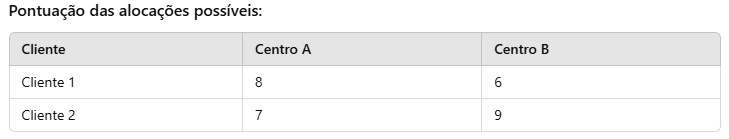

Queremos maximizar a pontuação total.

**Modelo Matemático**

Variáveis de Decisão:

𝑥
𝑖
𝑗
x
ij
​
 : 1 se o cliente
𝑖
i for alocado ao centro
𝑗
j, 0 caso contrário.

Função Objetivo:


Maximizar
8
𝑥
1
𝐴
+
6
𝑥
1
𝐵
+
7
𝑥
2
𝐴
+
9
𝑥
2
𝐵
8x
1A
​
 +6x
1B
​
 +7x
2A
​
 +9x
2B
​
 .


Restrições:

Cada cliente deve ser alocado a exatamente um centro:
𝑥
1
𝐴
+
𝑥
1
𝐵
=
1
x
1A
​
 +x
1B
​
 =1
𝑥
2
𝐴
+
𝑥
2
𝐵
=
1
x
2A
​
 +x
2B
​
 =1

Cada centro pode atender no máximo um cliente:
𝑥
1
𝐴
+
𝑥
2
𝐴
≤
1
x
1A
​
 +x
2A
​
 ≤1
𝑥
1
𝐵
+
𝑥
2
𝐵
≤
1
x
1B
​
 +x
2B
​
 ≤1

## Utilizando o algoritmo Branch and Bound

Branch and Bound divide o problema em subproblemas menores para explorar diferentes combinações de variáveis, eliminando subproblemas inviáveis ou com soluções piores do que a melhor encontrada até o momento.

**Passos do Branch and Bound**


1) Relaxação linear:

Resolver o problema relaxado, permitindo que as variáveis sejam contínuas (
0
≤
𝑥
≤
1
0≤x≤1) em vez de inteiras (
𝑥
∈
{
0
,
1
}
x∈{0,1}).


2) Testar Inteireza:

Se todas as variáveis na solução relaxada forem inteiras, essa é uma solução candidata.


3) Ramificação (Branching):

Escolher uma variável
𝑥
𝑖
𝑗
x
ij
​
  com valor fracionário na solução relaxada e criar dois subproblemas:
Fixar
𝑥
𝑖
𝑗
=
0
x
ij
​
 =0.
Fixar
𝑥
𝑖
𝑗
=
1
x
ij
​
 =1.


 4) Eliminação (Bounding):

Para cada subproblema, calcular o limite superior (valor da relaxação linear).
Descartar ramos cujo limite superior seja menor do que a melhor solução inteira encontrada até agora.

Iteração:

Repetir o processo até que todos os ramos tenham sido explorados ou descartados.

PSEUDOCODIGO

1. Usando uma heurística, encontre uma solução \( x_h \) para o problema de otimização.
2. Armazene seu valor: \( B = f(x_h) \).
   (Se nenhuma heurística estiver disponível, defina \( B \) para infinito.)
   \( B \) denotará a melhor solução encontrada até agora e será usada como limite superior em soluções candidatas.

3. Inicialize uma fila para conter uma solução parcial sem nenhuma das variáveis atribuídas.

4. Repita até que a fila esteja vazia:
   
   a. Retire um nó \( N \) da fila.

   b. Se \( N \) representa uma única solução candidata \( x \) e \( f(x) < B \), então:
      - \( x \) é a melhor solução até agora.
      - Registre-a e defina \( B \leftarrow f(x) \).

   c. Caso contrário, ramifique em \( N \) para produzir novos nós \( N_i \).
   
   d. Para cada um desses novos nós \( N_i \):
      - Se \( \text{bound}(N_i) > B \), não faça nada.
        (Como o limite inferior neste nó é maior que o limite superior do problema, ele nunca levará à solução ótima e pode ser descartado.)
      - Caso contrário, armazene \( N_i \) na fila.



In [ ]:
!pip install scipy

In [ ]:
import numpy as np
from scipy.optimize import linprog

In [ ]:
def branch_and_bound(coefficients, constraints, bounds):
  best_solution = None
  best_value = -np.inf # armazena o valor da melhor solução até o momento
  # inicializamos com - np.inf pois isso garante que qualquer valor será maior
  stack = [bounds] # inicializa a pilha com um único elemento, que são os limites

  while stack:
    current_bounds = stack.pop() # desempilha o último elemento e armazena nessa variável
    # ao retirar o elemento da pilha, o algoritmo indica que passará a explorar esse conjunto
    # de soluções

    '''
    lembrando que a pilha é uma estrutura de dados LIFO (last in, first out). Ou seja,
    o primeiro o último elemento adicionado à pilha é o último a ser retirado.
    isso é necessário porque, durante a execução do algoritmo, o problema original pode
    ser dividido em vários subproblemas (ou nós). Cada um desses subproblemas possui
    seus próprios limites e restrições (bounds). Assim a pilha armazena esses subproblemas
    por ordem de exploração e, quando a stack.pop() é executada, o algoritmo desempilha
    o próximo problema a ser resolvido :)
    '''

    # etapa da relaxação linear:
    result = linprog(-np.array(coefficients), A_eq=constraints['A_eq'], b_eq=constraints['b_eq'],
                         bounds=current_bounds, method='highs')

    '''
    transformando uma maximização em minimização ao inverter os sinais dos coeficientes da função objetivo
    (multiplicando por -1). As restrições de igualdade são passadas por A_eq e b_eq, e os limites das variáveis
    são fornecidos por current_bounds. O método de solução escolhido é o 'highs', que é um solver eficiente
    para programação linear. O resultado da otimização é armazenado na variável result.

    exemplo para explicar as variáveis:
    Se tivermos duas restrições de igualdade como:
    2x + 3y = 5 e x - y = 1

    As restrições de igualdade seriam:
    A_eq = np.array([[2, 3],   # Coeficientes da primeira restrição (2x + 3y)
                 [1, -1]])  # Coeficientes da segunda restrição (x - y)
    b_eq = np.array([5, 1])    # Valores constantes das restrições

    E por que inverter os sinais???
    Porque a maioria dos solvers de otimização tratam problemas de minimização e
    não de maximização. Então se você inverte os valores da função original encontra
    a solução que maximiza o resultado, você encontra os valores que maximizam a
    função original.
    '''

    if not result.success:
            continue

    solution = result.x # contém os valores das soluções que minimizam ou
    # maximizam a função objetivo
    value = -result.fun # o valor da função objetivo na solução encontrada
    # no caso da função objetivo, (porque foi invertido)

    # Testar inteireza
    # Solução encontrada só pode ser candidata se ela for inteira

    if all(np.isclose(solution, np.round(solution))):
      '''
      verifica se todos os elementos no array solution são praticamente
      inteiros, ou seja, se todos os valores em solution são muito próximos de
      seus valores arredondados. Se isso for verdade para todos os elementos, a
      expressão retorna True; caso contrário, retorna False.
      '''
      if value > best_value:
        best_value = value
        best_solution = solution
      else:
        # Escolher uma variável fracionária para ramificar
        # busca o primeiro valor que não se aproxima de nenhum
        fractional_index = next(i for i, x in enumerate(solution) if not np.isclose(x, round(x)))

        lower_bound = current_bounds.copy()
        lower_bound[fractional_index] = (0, 0) # cria um ramo inferior na árvore de busca
        # a variável deixa de ser um valor fracionária e é tratada como se fosse 0
        # essa nova solução deve ser adicionada à stack de nós a serem explorados

        upper_bound = current_bounds.copy()
        upper_bound[fractional_index] = (1, 1) # ramo superior
        stack.append(upper_bound)

      return best_solution, best_value

In [ ]:
# Dados do problema
coefficients = [8, 6, 7, 9]  # Pontuações
constraints = {
    'A_eq': [
        [1, 1, 0, 0],  # Cliente 1
        [0, 0, 1, 1],  # Cliente 2
        [1, 0, 1, 0],  # Centro A
        [0, 1, 0, 1]   # Centro B
    ],
    'b_eq': [1, 1, 1, 1]
}
bounds = [(0, 1)] * 4  # Variáveis binárias

# Resolver o problema
solution, value = branch_and_bound(coefficients, constraints, bounds)
print("Melhor solução encontrada:", solution)
print("Pontuação máxima:", value)

Melhor solução encontrada: [ 1. -0. -0.  1.]
Pontuação máxima: 17.0


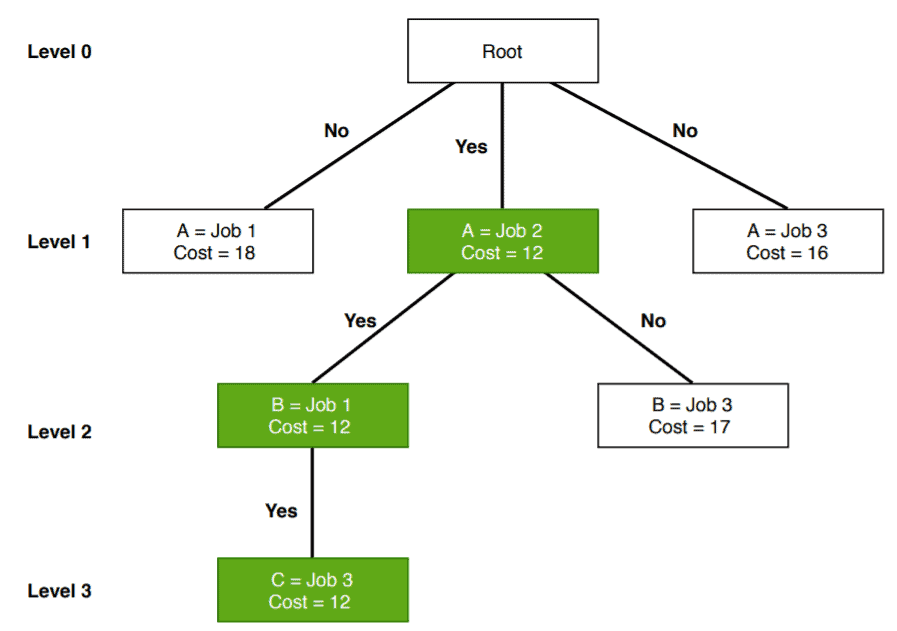

## Branch and Cut

O algoritmo Branch and Cut é uma extensão do Branch and Bound que combina a técnica de ramificação com cortes (cutting planes) para melhorar a eficiência do processo de busca da solução ótima.

Passos do Branch and Cut

1) Relaxação linear:

Resolver o problema relaxado, permitindo que as variáveis sejam contínuas ( 0 ≤ 𝑥 ≤ 1 0≤x≤1) em vez de inteiras ( 𝑥 ∈ { 0 , 1 } x∈{0,1}).

2) Testar Inteireza:

Se todas as variáveis na solução relaxada forem inteiras, essa é uma solução candidata.

3) Adicionar cortes (Cutting Planes)

Se a solução relaxada não for inteira, deve-se adicionar cortes (restrições adicionais para o problema). Esses cortes são restrições que ajudam a remover soluções fracionárias que não podem fazer parte da solução inteira.

4) Ramificação (Branching):

Escolher uma variável 𝑥 𝑖 𝑗 x ij​com valor fracionário na solução relaxada e criar dois subproblemas: Fixar 𝑥 𝑖 𝑗 = 0 x ij​=0. Fixar 𝑥 𝑖 𝑗 = 1 x ij​=1. Criação de uma árvore de decisão

5) Eliminação (Bounding):

Para cada subproblema, calcular o limite superior (valor da relaxação linear). Descartar ramos cujo limite superior seja menor do que a melhor solução inteira encontrada até agora.

Iteração:

Repetir o processo até que todos os ramos tenham sido explorados ou descartados.

In [ ]:
def cut(cuts, solution):
    '''
    Adiciona um corte com base na solução atual
    Existem diferentes tipos de corte para adicionar essa restrição adicional!!
    '''
    # Corte de Gomory
    '''
    Dada uma solução fracionária, extrai-se a parte fracionária da solução e
    cria-se uma desigualdade para eliminar essa solução, garantindo que soluções
    inteiras permaneçam viáveis.
    '''
    fractional_part = solution - np.floor(solution)
    new_cut = {"A": fractional_part, "b": np.sum(fractional_part) - 1}
    cuts.append(new_cut)

In [ ]:
def branch_and_cut(coefficients, constraints, bounds):
    best_solution = None
    best_value = -np.inf  # Valor da melhor solução até o momento
    stack = [bounds]  # Inicializa a pilha com os limites iniciais
    cuts = []  # Lista para armazenar cortes adicionais

    while stack:
        current_bounds = stack.pop()  # Desempilha o conjunto atual de limites

        # Etapa de relaxação linear
        result = linprog(
            -np.array(coefficients),
            A_eq=constraints["A_eq"],
            b_eq=constraints["b_eq"],
            bounds=current_bounds,
            method="highs"
        )

        if not result.success:
            continue

        solution = result.x  # Solução da relaxação linear
        value = -result.fun  # Valor da função objetivo (invertido de volta)

        # Adiciona cortes se houver partes fracionárias
        for cut in cuts:
            # Checa se a solução viola o corte
            if np.dot(cut["A"], solution) > cut["b"]:
              # calcula o produto escalar entre o vetor cut cut["A"] e a solução
              # se sim, o corte é violado
                break
        else:  # Se todos os cortes forem satisfeitos, continua
            # Testar inteireza
            if all(np.isclose(solution, np.round(solution))):
                if value > best_value:
                    best_value = value
                    best_solution = solution
            else:
                # Escolher uma variável fracionária para ramificar
                fractional_index = next(i for i, x in enumerate(solution) if not np.isclose(x, round(x)))

                # Criar novos ramos
                lower_bound = current_bounds.copy()
                lower_bound[fractional_index] = (0, 0)  # Fixar para 0
                stack.append(lower_bound)

                upper_bound = current_bounds.copy()
                upper_bound[fractional_index] = (1, 1)  # Fixar para 1
                stack.append(upper_bound)

                # Adiciona um novo corte com base na solução atual
                cut(cuts, solution)

    return best_solution, best_value

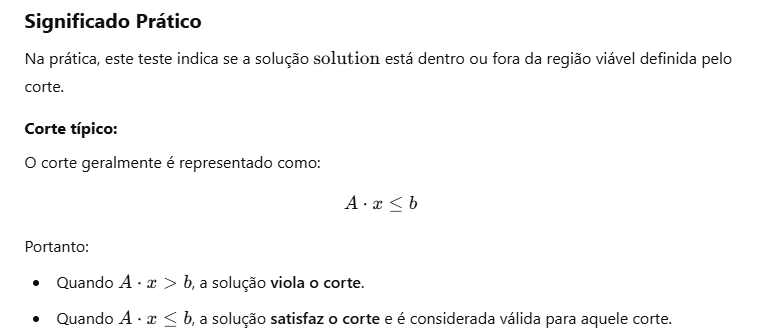

Exemplo numérico:

Dada uma expressão
3x1 + 2x2 <= 5

Sabemos que [A] = 3, 2

E a solução atual [1,2]

Calcule o produto escalar entre [A] e a solução

temos 3⋅1+2⋅2=3+4=7

Comparação:

7 > 5

Logo, essa solução viola o corte

In [ ]:
# Dados do problema
coefficients = [8, 6, 7, 9]  # Pontuações
constraints = {
    'A_eq': [
        [1, 1, 0, 0],  # Cliente 1
        [0, 0, 1, 1],  # Cliente 2
        [1, 0, 1, 0],  # Centro A
        [0, 1, 0, 1]   # Centro B
    ],
    'b_eq': [1, 1, 1, 1]
}
bounds = [(0, 1)] * 4  # Variáveis binárias

# Resolver o problema
solution, value = branch_and_cut(coefficients, constraints, bounds)
print("Melhor solução encontrada:", solution)
print("Pontuação máxima:", value)

Melhor solução encontrada: [ 1. -0. -0.  1.]
Pontuação máxima: 17.0


## Biblioteca OR tools

In [ ]:
!pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.26.1 which is incompatible.
tensorflow-metadata 1.13.1 requires absl-py<2.0.0,>=0.9, but you have absl-py 2.1.0 which is incompatible

In [ ]:
from ortools.linear_solver import pywraplp

def allocate_clients_to_centers(efficiency):
    # Criar o solver
    solver = pywraplp.Solver.CreateSolver('SCIP')

    if not solver:
        raise Exception("O solver não está disponível.")

    num_clients = len(efficiency)  # Número de clientes
    num_centers = len(efficiency[0])  # Número de centros

    # Criar variáveis de decisão
    x = {}
    for i in range(num_clients):
        for j in range(num_centers):
            x[i, j] = solver.BoolVar(f'x[{i},{j}]')  # Variável binária

    # Restrições: Cada cliente deve ser alocado a exatamente um centro
    for i in range(num_clients):
        solver.Add(sum(x[i, j] for j in range(num_centers)) == 1)

    # Restrições: Cada centro deve atender no máximo um cliente
    for j in range(num_centers):
        solver.Add(sum(x[i, j] for i in range(num_clients)) <= 1)

    # Função objetivo: Maximizar a eficiência total
    solver.Maximize(solver.Sum(efficiency[i][j] * x[i, j] for i in range(num_clients) for j in range(num_centers)))

    # Resolver o problema
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("Solução ótima encontrada!")
        print("Alocações:")
        total_efficiency = 0
        for i in range(num_clients):
            for j in range(num_centers):
                if x[i, j].solution_value() == 1:
                    print(f"Cliente {i} -> Centro {j} (Pontuação: {efficiency[i][j]})")
                    total_efficiency += efficiency[i][j]
        print(f"Eficiência total: {total_efficiency}")
    else:
        print("Não foi possível encontrar uma solução.")

# Exemplo de pontuações (matriz de eficiência)
efficiency = [
    [8, 6],  # Cliente 0 para Centros 0 e 1
    [7, 9]   # Cliente 1 para Centros 0 e 1
]

allocate_clients_to_centers(efficiency)

Solução ótima encontrada!
Alocações:
Cliente 0 -> Centro 0 (Pontuação: 8)
Cliente 1 -> Centro 1 (Pontuação: 9)
Eficiência total: 17


In [ ]:
from ortools.linear_solver import pywraplp

def allocate_clients_to_centers(efficiency):
    # Criar o solver
    solver = pywraplp.Solver.CreateSolver('CBC')

    if not solver:
        raise Exception("O solver não está disponível.")

    num_clients = len(efficiency)  # Número de clientes
    num_centers = len(efficiency[0])  # Número de centros

    # Criar variáveis de decisão
    x = {}
    for i in range(num_clients):
        for j in range(num_centers):
            x[i, j] = solver.BoolVar(f'x[{i},{j}]')  # Variável binária

    # Restrições: Cada cliente deve ser alocado a exatamente um centro
    for i in range(num_clients):
        solver.Add(sum(x[i, j] for j in range(num_centers)) == 1)

    # Restrições: Cada centro deve atender no máximo um cliente
    for j in range(num_centers):
        solver.Add(sum(x[i, j] for i in range(num_clients)) <= 1)

    # Função objetivo: Maximizar a eficiência total
    solver.Maximize(solver.Sum(efficiency[i][j] * x[i, j] for i in range(num_clients) for j in range(num_centers)))

    # Resolver o problema
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("Solução ótima encontrada!")
        print("Alocações:")
        total_efficiency = 0
        for i in range(num_clients):
            for j in range(num_centers):
                if x[i, j].solution_value() == 1:
                    print(f"Cliente {i} -> Centro {j} (Pontuação: {efficiency[i][j]})")
                    total_efficiency += efficiency[i][j]
        print(f"Eficiência total: {total_efficiency}")
    else:
        print("Não foi possível encontrar uma solução.")

# Exemplo de pontuações (matriz de eficiência)
efficiency = [
    [8, 6],  # Cliente 0 para Centros 0 e 1
    [7, 9]   # Cliente 1 para Centros 0 e 1
]

allocate_clients_to_centers(efficiency)

Solução ótima encontrada!
Alocações:
Cliente 0 -> Centro 0 (Pontuação: 8)
Cliente 1 -> Centro 1 (Pontuação: 9)
Eficiência total: 17


In [ ]:
from ortools.linear_solver import pywraplp

def allocate_clients_to_centers(efficiency):
    # Criar o solver
    solver = pywraplp.Solver.CreateSolver('CBC')
    if not solver:
        print("Solver não disponível.")
        return

    num_clients = len(efficiency)
    num_centers = len(efficiency[0])

    # Variáveis de decisão: x[i][j] = 1 se cliente i for alocado ao centro j
    x = {}
    for i in range(num_clients):
        for j in range(num_centers):
            x[i, j] = solver.BoolVar(f'x[{i},{j}]')

    # Restrição 1: Cada cliente deve ser alocado a exatamente 1 centro
    for i in range(num_clients):
        solver.Add(sum(x[i, j] for j in range(num_centers)) == 1)

    # Restrição 2: Cada centro pode atender no máximo 1 cliente
    for j in range(num_centers):
        solver.Add(sum(x[i, j] for i in range(num_clients)) <= 1)

    # Função objetivo: maximizar a eficiência total
    solver.Maximize(solver.Sum(x[i, j] * efficiency[i][j] for i in range(num_clients) for j in range(num_centers)))

    # Resolver o problema
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("Solução ótima encontrada!")
        solution = {}
        for i in range(num_clients):
            for j in range(num_centers):
                if x[i, j].solution_value() > 0:
                    solution[f'Cliente {i}'] = f'Centro {j}'
        print("Alocação:", solution)

        # Verificar restrições
        print("\nVerificando restrições...")

        # Verificar se cada cliente foi alocado a exatamente um centro
        for i in range(num_clients):
            assigned_centers = sum(x[i, j].solution_value() for j in range(num_centers))
            assert assigned_centers == 1, f"Cliente {i} não foi alocado corretamente!"

        # Verificar se cada centro atende no máximo um cliente
        for j in range(num_centers):
            assigned_clients = sum(x[i, j].solution_value() for i in range(num_clients))
            assert assigned_clients <= 1, f"Centro {j} atende mais de um cliente!"

        print("Restrições satisfeitas!")
    else:
        print("Não foi possível encontrar uma solução ótima.")

# Exemplo de pontuações (matriz de eficiência)
efficiency = [
    [8, 6],  # Cliente 0 para Centros 0 e 1
    [7, 9]   # Cliente 1 para Centros 0 e 1
]

allocate_clients_to_centers(efficiency)

Solução ótima encontrada!
Alocação: {'Cliente 0': 'Centro 0', 'Cliente 1': 'Centro 1'}

Verificando restrições...
Restrições satisfeitas!
